In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('housing.csv')

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [4]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [5]:
df.isnull().sum()/df.shape[0]*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

<Axes: >

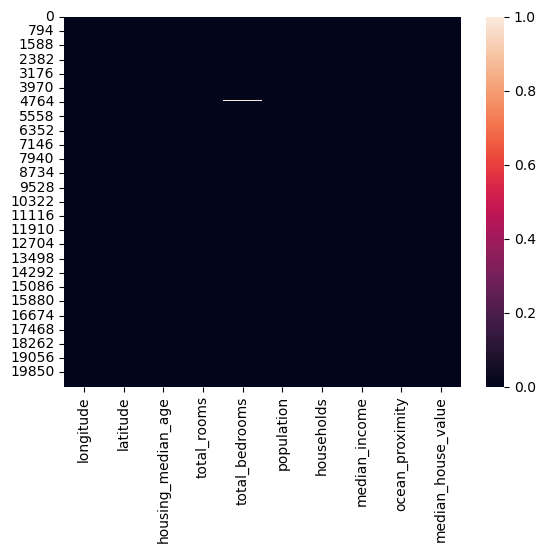

In [6]:
sb.heatmap(df.isnull())

In [7]:
a=df['total_bedrooms'].mean()

In [8]:
a

537.8705525375618

In [9]:
df['total_bedrooms'].fillna(a,inplace=True)

<Axes: >

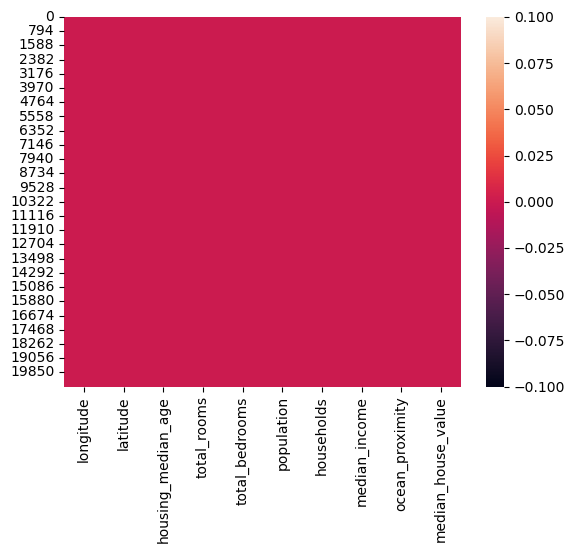

In [10]:
sb.heatmap(df.isnull())

In [11]:
df_obj=df.select_dtypes(object)
df_obj

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [12]:
df_num=df.select_dtypes(['float64','int64'])

In [13]:
df_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700


In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_obj.columns
for i in df_obj:
    df_obj[i]=le.fit_transform(df_obj[i])

In [15]:
df_obj

,ocean_proximity
0,3
1,3
2,3
3,3
4,3
...,...
20635,1
20636,1
20637,1
20638,1


In [16]:
df_sum=pd.concat([df_obj,df_num],axis=1)

In [17]:
df_sum

,ocean_proximity,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,3,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,3,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,3,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,3,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...,...
20635,1,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100
20636,1,-121.21,39.49,18,697,150.0,356,114,2.5568,77100
20637,1,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300
20638,1,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700


In [18]:
X=df_sum.drop('median_house_value',axis=1)
Y=df_sum['median_house_value']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [21]:
X_train.shape

(14448, 9)

In [22]:
X_test.shape

(6192, 9)

In [23]:
Y_train.shape

(14448,)

In [24]:
Y_test.shape

(6192,)

In [25]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [26]:
X_train

array([[-0.82137984,  0.64821297, -0.68811806, ...,  1.53466411,
         1.76494143, -0.50715954],
       [-0.82137984,  0.6531961 , -0.85669979, ...,  0.20264384,
        -0.11785725, -0.36780162],
       [-0.11913143, -0.08929041,  0.52473385, ..., -0.12284318,
        -0.06286591, -0.72098999],
       ...,
       [-0.82137984,  0.6531961 , -0.79582306, ..., -0.57834812,
        -0.54469478, -1.45114921],
       [-0.11913143,  1.2013405 , -0.88947957, ..., -0.09365549,
        -0.06286591, -0.65684615],
       [ 1.28536541, -1.31015748,  1.01174774, ..., -0.37138083,
        -0.29068717, -0.83089789]])

In [27]:
X_test

array([[-0.82137984,  0.60336479, -0.73494632, ..., -0.28293327,
         0.32207346, -0.32961194],
       [-0.11913143, -0.1042398 ,  0.53878233, ..., -0.2528611 ,
        -0.16499268, -1.00314873],
       [ 1.28536541, -1.41978636,  0.98365079, ...,  0.09296887,
        -0.24878901,  0.07463726],
       ...,
       [ 1.28536541, -1.33507314,  1.166281  , ..., -0.56154308,
        -0.56302523, -0.68105238],
       [ 1.28536541, -1.33009001,  1.14286687, ...,  1.35157766,
         1.51878972, -0.66871091],
       [-0.82137984,  0.63326357, -0.71621502, ...,  1.77170358,
         1.76232279, -1.14621438]])

In [28]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [29]:
lr.coef_

array([   489.69218684, -85655.91713519, -90457.49737569,  14624.70655328,
       -17529.3628734 ,  40987.93986096, -42427.38867094,  23527.08137855,
        76980.93590138])

In [30]:
lr.intercept_

207653.14825581462

In [31]:
ypred=lr.predict(X_test)
ypred

array([239813.12777098, 102640.00233158, 251207.05306164, ...,
       183609.88953861, 169038.52494359, 171216.44515353])

In [32]:
dict={"Actual output":Y_test,"predict output":ypred}
df1=pd.DataFrame(dict)
df1

,Actual output,predict output
4712,355000,239813.127771
2151,70700,102640.002332
15927,229400,251207.053062
82,112500,158801.773488
8161,225400,283576.722369
...,...,...
11387,211300,222805.998277
2523,87500,135182.041809
18897,109800,183609.889539
18878,162500,169038.524944


In [33]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,ypred)
print("mearn sqaured error",mse)

mearn sqaured error 4911977143.621089


In [34]:
rmse=np.sqrt(mse)

In [35]:
rmse

70085.49881124546

In [36]:
from sklearn.metrics import r2_score

In [37]:
print('r2score is ',r2_score(Y_test,ypred))

r2score is  0.6263755708782924


In [38]:
residual_error=Y_test-ypred

In [39]:
residual_error

4712     115186.872229
2151     -31940.002332
15927    -21807.053062
82       -46301.773488
8161     -58176.722369
             ...      
11387    -11505.998277
2523     -47682.041809
18897    -73809.889539
18878     -6538.524944
4287      -4516.445154
Name: median_house_value, Length: 6192, dtype: float64

Text(0, 0.5, 'residual error')

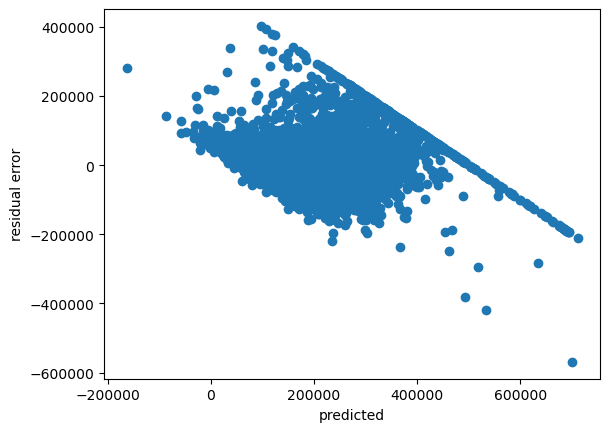

In [40]:

plt.scatter(ypred,residual_error)
plt.xlabel('predicted')
plt.ylabel('residual error')

<Axes: >

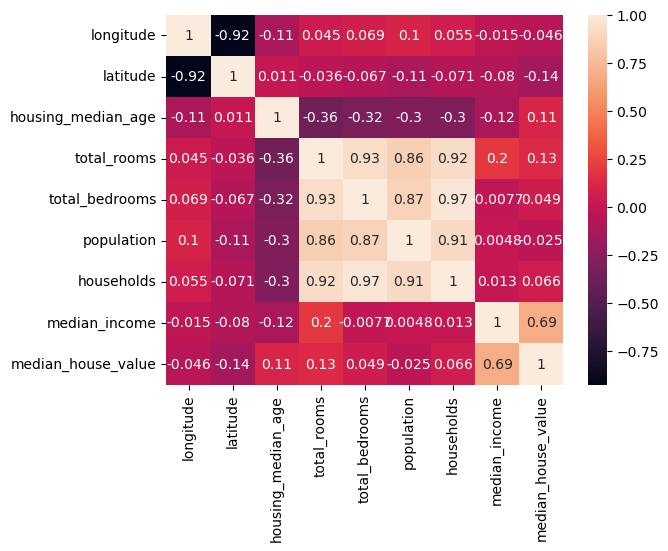

In [41]:
sb.heatmap(df.corr(),annot=True)

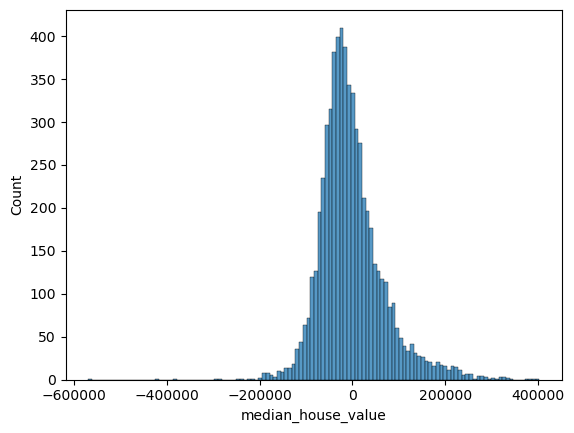

In [42]:
sb.histplot(residual_error)
plt.show()

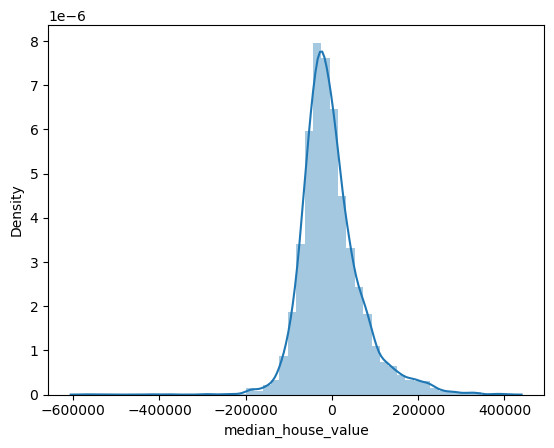

In [43]:
sb.distplot(residual_error,hist=True)
plt.show()

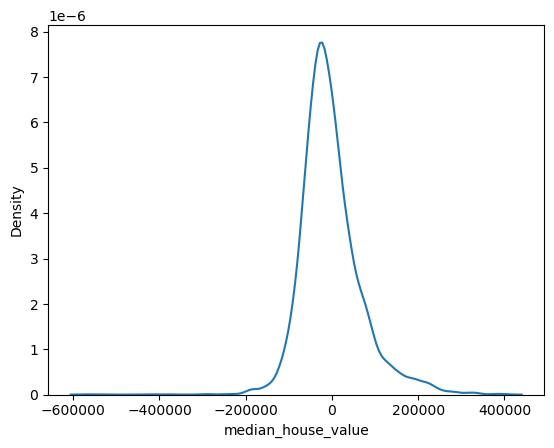

In [44]:
sb.distplot(residual_error,hist=False)
plt.show()

In [45]:
print(residual_error.skew())

0.946629083342924


In [46]:
lr.score(X_train,Y_train)

0.6390263310147728

In [47]:
lr.score(X_test,Y_test)

0.6263755708782924

In [48]:
X=df_sum.drop(['population'],axis=1)  #'total_rooms','total_bedrooms',

In [49]:
Y=df_sum['median_house_value']

In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
pf=PolynomialFeatures(2)

In [52]:
X_poly=pf.fit_transform(X)

In [53]:
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [54]:
X_train.shape

(14448, 55)

In [55]:
X_test.shape

(6192, 55)

In [56]:
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [57]:
# X_train

In [58]:
# X_test

In [59]:
lr.fit(X_train,Y_train)

LinearRegression()

In [60]:
lr.coef_

array([-2.15480349e-12,  7.07586878e-10, -7.33052730e-10, -6.33008312e-10,
       -1.81898940e-11,  3.09228199e-10,  1.66255631e-09, -1.81444193e-09,
       -7.16681825e-10,  1.15696465e+05, -3.63797881e-12,  1.38106770e-09,
        7.42147677e-10, -3.00133252e-11,  6.54836185e-11, -7.27595761e-12,
       -3.63797881e-11, -3.68345354e-11, -1.18234311e-11, -1.15142029e-09,
       -1.42927092e-09,  9.36779543e-11,  7.07586878e-10,  2.53794497e-09,
       -2.99542080e-09, -7.95807864e-10,  5.31144906e-10, -3.78349796e-10,
        5.41149348e-11,  5.04769559e-11,  1.10685505e-09, -1.12345333e-09,
       -5.91171556e-11,  1.20053301e-10,  6.95763447e-11,  9.27684596e-11,
       -4.00177669e-11, -3.27418093e-11, -1.18234311e-11,  3.63797881e-12,
       -1.36424205e-11, -1.63709046e-11,  2.11002771e-10,  3.77440301e-11,
        8.18545232e-12, -7.82165444e-11, -9.09494702e-12, -9.77706804e-12,
       -1.81898940e-12, -6.82121026e-11,  3.92219590e-12, -2.91038305e-11,
        3.63797881e-12,  

In [61]:
lr.intercept_

207653.14825581395

In [62]:
ypred=lr.predict(X_test)

In [63]:
ypred

array([355000.,  70700., 229400., ..., 109800., 162500., 166700.])

In [64]:
dict={"Actual op":Y_test,'predict op':ypred}
df2=pd.DataFrame(dict)
df2

,Actual op,predict op
4712,355000,355000.0
2151,70700,70700.0
15927,229400,229400.0
82,112500,112500.0
8161,225400,225400.0
...,...,...
11387,211300,211300.0
2523,87500,87500.0
18897,109800,109800.0
18878,162500,162500.0


In [65]:
print("mean sqaured error",mean_squared_error(Y_test,ypred)) 

mean sqaured error 1.368354230549271e-20


In [66]:
mse=mean_squared_error(Y_test,ypred)
print(mse)
rmse=np.sqrt(mse)
print("Root Mean Squared Error",rmse)

1.368354230549271e-20
Root Mean Squared Error 1.1697667419401488e-10


In [67]:
from sklearn.metrics import r2_score
print('r2_score',r2_score(Y_test,ypred))

r2_score 1.0


In [68]:
residual_error=Y_test-ypred
print('Residual error for each data points ',residual_error)

Residual error for each data points  4712    -1.164153e-10
2151     1.164153e-10
15927   -8.731149e-11
82       2.910383e-11
8161     2.910383e-11
             ...     
11387    5.820766e-11
2523     0.000000e+00
18897   -1.455192e-11
18878   -8.731149e-11
4287    -2.910383e-11
Name: median_house_value, Length: 6192, dtype: float64


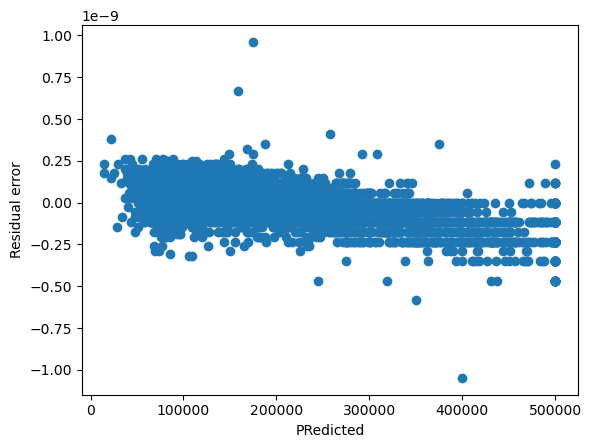

In [69]:
import matplotlib.pyplot as plt
plt.scatter(ypred,residual_error)
# sb.scatterplot(y_pred,residual_error)
# plt.plot(y_pred,residual_error,color='red')
plt.xlabel('PRedicted')
plt.ylabel('Residual error')
plt.show()

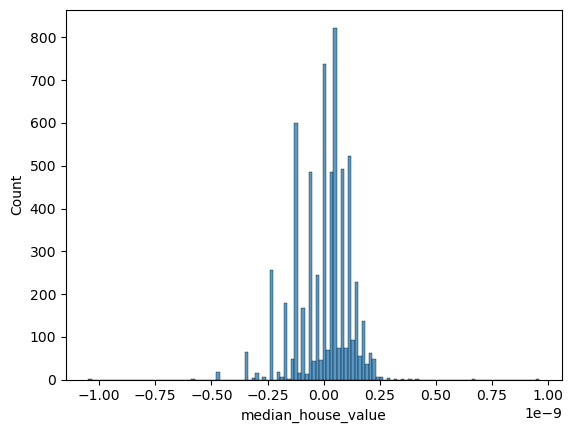

In [70]:
sb.histplot(residual_error)
plt.show()

In [71]:
# sb.distplot(residual_error,hist=True)
# plt.show()

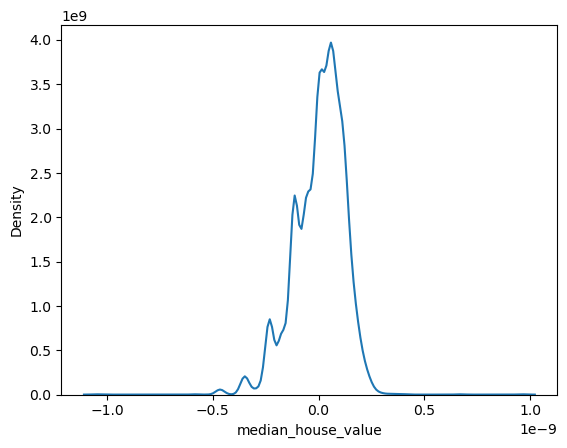

In [72]:
sb.distplot(residual_error,hist=False)
plt.show()

In [73]:
print(residual_error.skew())

0


In [74]:
lr.score(X_train,Y_train)

1.0

In [75]:
lr.score(X_test,Y_test)

1.0

In [76]:
pip install nbconvert[webpdf]


Note: you may need to restart the kernel to use updated packages.
